# Speech Emotion Recognition – Preprocessing
## Notebook 5: Normalization / Scaling

**Registration Name:** IT24102773  
**Task:** Apply Normalization and Scaling Techniques to the Dataset.  
**Objective:** Ensure all Features contribute equally to the Model by Standardizing their Ranges.

### Step 1: Importing Libraries and Data Arrays
First, we need to import the necessary Libraries and Data Arrays of Extracted Features.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = np.load("../results/features_and_labels/X_features.npy", allow_pickle=False)
y = np.load("../results/features_and_labels/y_labels.npy", allow_pickle=True)

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Features shape: (2870, 116)
Labels shape: (2870,)


### Step 2: Inspect Feature Distributions before Scaling
We will plot Histograms of a First 5 Features to see their Ranges before Scaling.

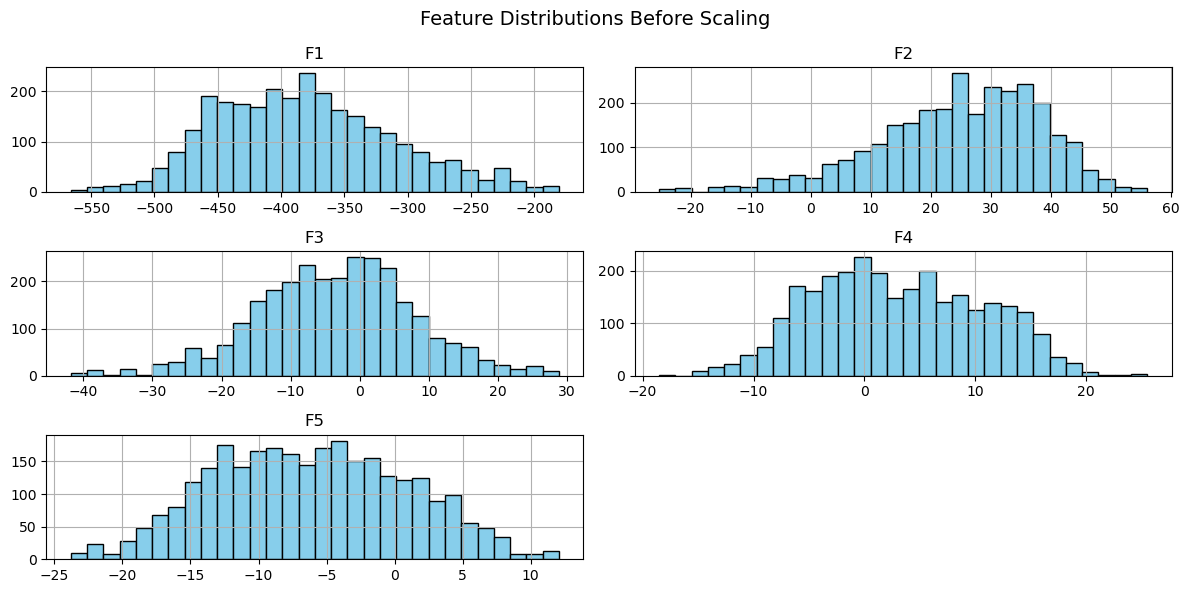

In [50]:
df = pd.DataFrame(X[:, :5], columns=[f"F{i}" for i in range(1,6)])

df.hist(bins=30, figsize=(12,6), color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions Before Scaling", fontsize=14)
plt.tight_layout()
plt.show()

### Step 3: Apply Standard Scaling
This method scales features so they have **mean = 0** and **standard deviation = 1**.

In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Mean of Scaled Features (First 10):", X_scaled[:, 0:10].mean(axis=0))
print()
print("Standard Deviation of Scaled Features (First 10):", X_scaled[:, 0:10].std(axis=0))

Mean of Scaled Features (First 10): [-4.9220561e-09 -3.0944573e-08  8.4967773e-08  6.2844478e-08
 -2.7829345e-09 -5.1691973e-08  2.6043283e-08 -8.4474529e-08
 -5.5087570e-09 -2.0840858e-08]

Standard Deviation of Scaled Features (First 10): [1.0000006  1.         1.         0.9999997  0.9999995  0.9999993
 0.9999994  0.99999964 0.9999996  0.99999976]


### Step 4: Apply Min-Max Normalization (For Demonstration)
This method scales features into a range [0, 1].

In [57]:
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X)

print("Range of First 10 Features after MinMax Scaling:", 
      X_minmax[:,0:10].min(), "to", X_minmax[:,0:10].max())

Range of First 10 Features after MinMax Scaling: 0.0 to 1.0


### Step 5: Inspect Feature Distributions after Scaling
Now, we will plot Histograms of same First 5 Features to see their Ranges after Scaling.

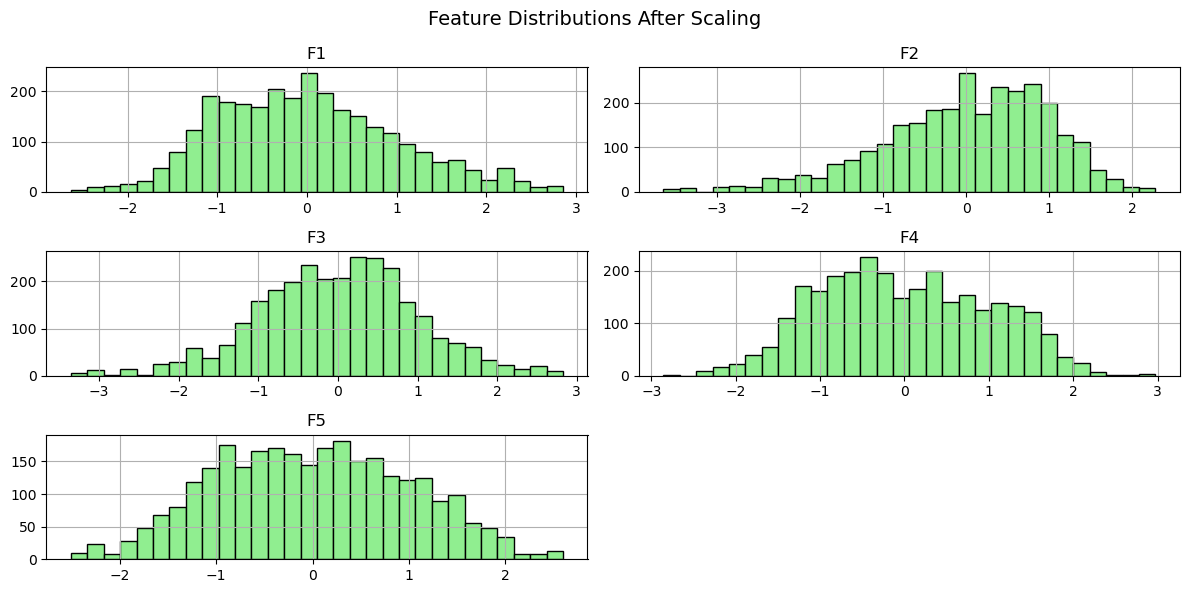

In [58]:
df_scaled = pd.DataFrame(X_scaled[:, :5], columns=[f"F{i}" for i in range(1,6)])

df_scaled.hist(bins=30, figsize=(12,6), color="lightgreen", edgecolor="black")
plt.suptitle("Feature Distributions After Scaling", fontsize=14)
plt.tight_layout()
plt.show()

### Step 6: Compare Distributions Before and After Scaling (First 3 Features)

#### Feature : F1

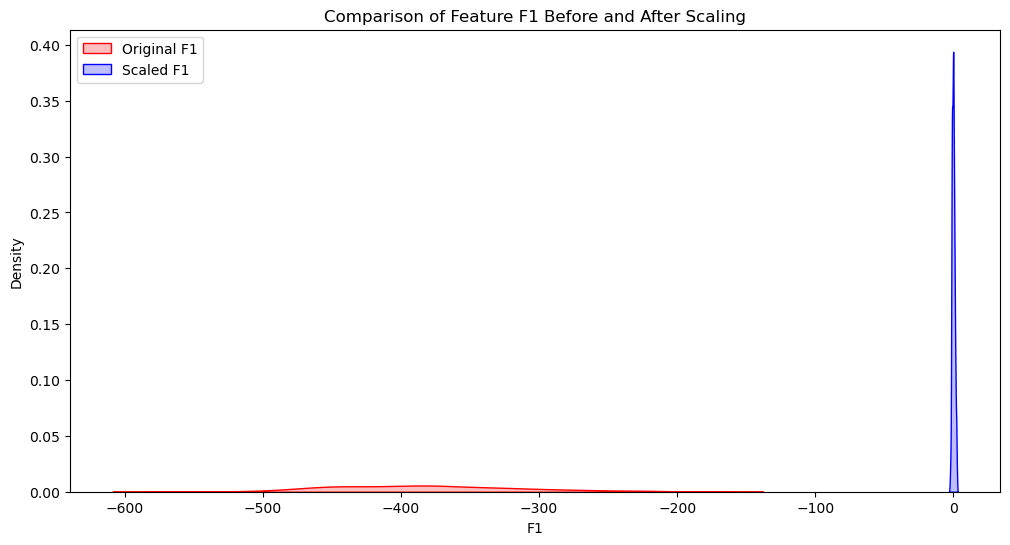

In [64]:
df_scaled = pd.DataFrame(X_scaled[:, :5], columns=[f"F{i}" for i in range(1, 6)])

plt.figure(figsize=(12,6))
sns.kdeplot(df["F1"], label="Original F1", fill=True, color="red")
sns.kdeplot(df_scaled["F1"], label="Scaled F1", fill=True, color="blue")
plt.title("Comparison of Feature F1 Before and After Scaling")
plt.legend()
plt.show()

#### Feature : F2

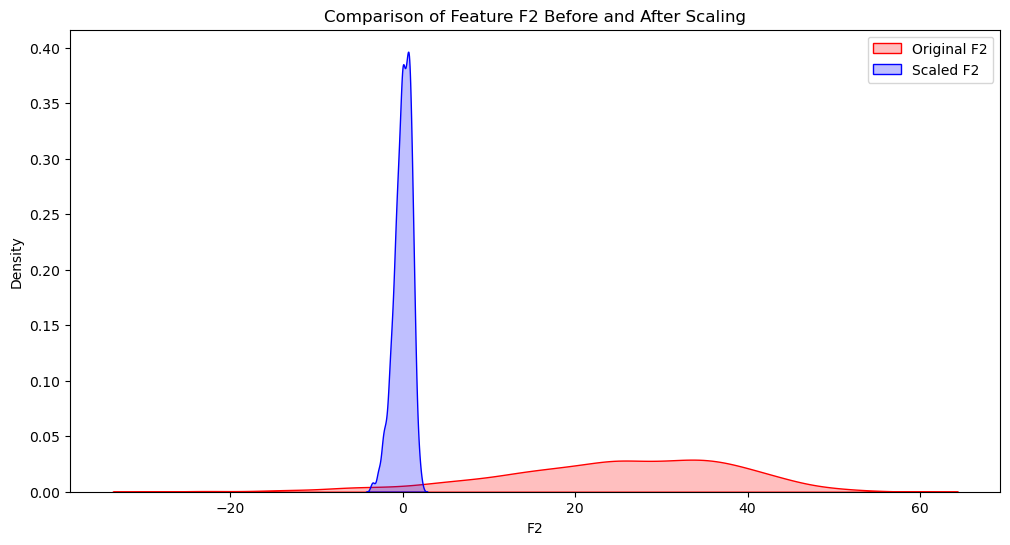

In [65]:
plt.figure(figsize=(12,6))
sns.kdeplot(df["F2"], label="Original F2", fill=True, color="red")
sns.kdeplot(df_scaled["F2"], label="Scaled F2", fill=True, color="blue")
plt.title("Comparison of Feature F2 Before and After Scaling")
plt.legend()
plt.show()

#### Feature : F3

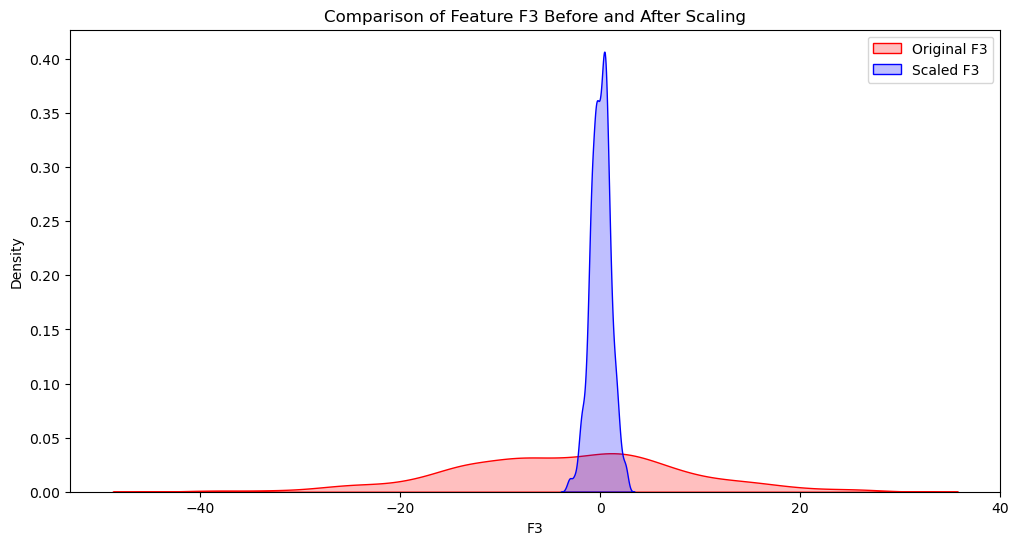

In [66]:
plt.figure(figsize=(12,6))
sns.kdeplot(df["F3"], label="Original F3", fill=True, color="red")
sns.kdeplot(df_scaled["F3"], label="Scaled F3", fill=True, color="blue")
plt.title("Comparison of Feature F3 Before and After Scaling")
plt.legend()
plt.show()

# ✅ Conclusion
- Original features had very different ranges and distributions.  
- Applied **StandardScaler** to bring features to mean = 0 and std = 1.  
- Demonstrated **MinMaxScaler** as an alternative (values between 0–1).  
- Scaling ensures all features contribute equally during training.